# Project: Investigate a Dataset - European Soccer Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This notebook is to analyze the European Soccer Dataset. This notebook will answer the following questions:

<li><a href="#question1">Which team has seen the most improvement in terms of goals scored per season?</a></li>
<li><a href="#question2">Which defensive attributes lead to the most number of wins every season in the English Premier League?</a></li>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
leagues_df = pd.read_csv('raw_data/leaguesRawData.csv')
leagues_df.head()

,id,name,id:1,country_id,name:1
0,1,Belgium,1,1,Belgium Jupiler League
1,1729,England,1729,1729,England Premier League
2,4769,France,4769,4769,France Ligue 1
3,7809,Germany,7809,7809,Germany 1. Bundesliga
4,10257,Italy,10257,10257,Italy Serie A


In [4]:
matches_df = pd.read_csv('raw_data/matches_refined.csv')

In [5]:
players_df = pd.read_csv('raw_data/playersRawData.csv')

In [6]:
teams_attr = pd.read_csv('raw_data/teamAttrRawData.csv')

In [22]:
def check_info_null(df):
    print('\nINFO:\n')
    print(df.info())
    print('\nNo. Of NUlls: \n')
    print(df.isna().sum())

#### Checking structure of leagues_df

In [23]:
leagues_df.head()

,id,name,id:1,country_id,name:1
0,1,Belgium,1,1,Belgium Jupiler League
1,1729,England,1729,1729,England Premier League
2,4769,France,4769,4769,France Ligue 1
3,7809,Germany,7809,7809,Germany 1. Bundesliga
4,10257,Italy,10257,10257,Italy Serie A


In [24]:
check_info_null(leagues_df)


INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   name        11 non-null     object
 2   id:1        11 non-null     int64 
 3   country_id  11 non-null     int64 
 4   name:1      11 non-null     object
dtypes: int64(3), object(2)
memory usage: 572.0+ bytes
None

No. Of NUlls: 

id            0
name          0
id:1          0
country_id    0
name:1        0
dtype: int64


Changes required:
<li>Remove 'id:1' column</li>
<li>Rename 'name:1' to 'Country Name' column</li>

#### Checking structure of matches_df

In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
matches_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [27]:
check_info_null(matches_df)


INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   stage             25979 non-null  int64 
 5   date              25979 non-null  object
 6   match_api_id      25979 non-null  int64 
 7   home_team_api_id  25979 non-null  int64 
 8   away_team_api_id  25979 non-null  int64 
 9   home_team_goal    25979 non-null  int64 
 10  away_team_goal    25979 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 2.2+ MB
None

No. Of NUlls: 

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal 

Changes required:
<li>Add a column to signify the winner of the match. team_api_id for winner, 0 for draw</li>

#### Checking structure of players_df

In [11]:
players_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id:1,player_fifa_api_id:1,player_api_id:1,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [28]:
check_info_null(players_df)


INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 49 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    183978 non-null  int64  
 1   player_api_id         183978 non-null  int64  
 2   player_name           183978 non-null  object 
 3   player_fifa_api_id    183978 non-null  int64  
 4   birthday              183978 non-null  object 
 5   height                183978 non-null  float64
 6   weight                183978 non-null  int64  
 7   id:1                  183978 non-null  int64  
 8   player_fifa_api_id:1  183978 non-null  int64  
 9   player_api_id:1       183978 non-null  int64  
 10  date                  183978 non-null  object 
 11  overall_rating        183142 non-null  float64
 12  potential             183142 non-null  float64
 13  preferred_foot        183142 non-null  object 
 14  attacking_work_rate   177109 non-null  objec

Changes required:
<li>Remove duplicate columns and values</li>
<li>Impute the null values</li>

#### Checking structure of teams_attr

In [14]:
teams_attr.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [29]:
check_info_null(teams_attr)


INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass

Changes required:
<li>Drop 'buildUpPlayDribbling' column as it has more null values than actual data</li>

### Data Cleaning 

#### leagues_df
For leagues_df, we need to drop the duplicate column name 'id:1' and change the name of the 'name:1' column to 'Country'.

In [17]:
leagues_df.drop(['id:1'], axis=1, inplace=True)
leagues_df.head()


,id,name,country_id,name:1
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A


In [18]:
leagues_df.rename(columns={'name' : 'Country'}, inplace=True)
leagues_df.rename(columns={'name:1': 'League'}, inplace=True)
leagues_df.head()

,id,Country,country_id,League
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A


#### matches_df
Add a column to signify which team won which match.

In [19]:
outcome_list = list()
for i in range(len(matches_df)):
    if matches_df.iloc[i]['home_team_goal'] > matches_df.iloc[i]['away_team_goal']:
        outcome_list.append(matches_df.iloc[i]['home_team_api_id'])
    elif matches_df.iloc[i]['home_team_goal'] < matches_df.iloc[i]['away_team_goal']:
        outcome_list.append(matches_df.iloc[i]['away_team_api_id'])
    else:
        outcome_list.append(0)

In [20]:
matches_df_refined = matches_df.assign(outcomes = outcome_list)
matches_df_refined.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,outcomes
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,0
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,8635
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,9991
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,9985


#### players_df

For players_df, we need to remove the duplicate columns, and impute the values of the null values.

We will use the column means to impute the values for the respective columns.

Also, dropping the data for players, where overall_Rating is null.

In [21]:
players_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id:1,player_fifa_api_id:1,player_api_id:1,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [22]:
## dropping duplicate columns
players_df.drop(['id:1', 'player_fifa_api_id:1', 'player_api_id:1'], axis=1, inplace=True)
players_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [23]:
## dropping players data with overall_rating as null
players_df = players_df[players_df['overall_rating'].notna()]
players_df.isna().sum()

id                        0
player_api_id             0
player_name               0
player_fifa_api_id        0
birthday                  0
height                    0
weight                    0
date                      0
overall_rating            0
potential                 0
preferred_foot            0
attacking_work_rate    6033
defensive_work_rate       0
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                1877
dribbling                 0
curve                  1877
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                1877
reactions                 0
balance                1877
shot_power                0
jumping                1877
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning         

In [24]:
## imputing null values for numeric columns using their mean
null_numeric_list = ['volleys', 'curve', 'agility', 'balance', 'jumping', 'vision', 'sliding_tackle']

for column in null_numeric_list:
    players_df[column].fillna(players_df[column].mean(), inplace=True)
players_df.isna().sum()

C:\Users\aayus\AppData\Local\Temp\ipykernel_25992\1148625082.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  players_df[column].fillna(players_df[column].mean(), inplace=True)


id                        0
player_api_id             0
player_name               0
player_fifa_api_id        0
birthday                  0
height                    0
weight                    0
date                      0
overall_rating            0
potential                 0
preferred_foot            0
attacking_work_rate    6033
defensive_work_rate       0
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                   0
dribbling                 0
curve                     0
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                   0
reactions                 0
balance                   0
shot_power                0
jumping                   0
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning         

In [25]:
players_df.attacking_work_rate.unique()

array(['medium', 'high', nan, 'low', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [26]:
attacking_work_rate_groups = players_df.loc[:,'attacking_work_rate':]
attacking_work_rate_groups.drop(['defensive_work_rate'], axis=1, inplace=True)
attacking_work_rate_groups.groupby(['attacking_work_rate']).mean()

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
attacking_work_rate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high,64.029774,59.676599,59.874740,67.716624,58.315158,69.402984,62.064965,56.062957,60.501459,70.774911,75.445555,75.589333,73.265535,69.014805,70.300586,69.035121,68.240992,73.411087,66.301403,62.200710,63.019639,51.400532,65.861266,63.790206,60.628541,45.142564,49.479369,47.406744,9.856619,11.215515,15.361838,11.190225,11.135301
le,49.980769,51.548077,53.644231,59.423077,47.972878,54.865385,52.424111,51.413462,54.442308,59.153846,67.423077,67.144231,65.886958,64.586538,61.278143,57.144231,62.896107,64.721154,63.865385,51.403846,57.615385,57.057692,57.884615,63.064541,58.548077,43.009615,45.961538,45.250365,14.384615,24.000000,46.586538,23.971154,24.028846
low,48.363170,38.386626,66.929280,61.333645,40.495857,49.102346,43.861828,43.065118,56.926596,59.851091,59.988797,61.260124,56.692380,64.991714,60.290466,58.367604,68.876532,65.814564,75.335395,45.308437,70.612440,65.407749,45.341814,52.472050,50.726456,64.266659,66.818765,63.770218,9.808963,11.761699,18.128253,11.676392,11.758665
medium,52.664676,47.547805,55.697609,60.854138,47.208579,56.640785,50.657360,47.588870,55.995642,61.295554,65.648429,66.058135,64.252355,65.330215,63.800192,59.760614,66.453818,64.997138,67.278052,51.023275,59.580027,51.046486,53.005837,56.236604,53.279460,46.058959,49.498801,47.150028,16.710578,17.766931,22.059639,17.880779,18.334805
norm,54.675287,50.250000,60.956897,60.864943,48.139430,55.683908,53.071655,51.879310,53.278736,61.818966,66.594828,67.603448,63.868098,62.594828,65.536995,59.379310,64.419656,66.267241,64.790230,52.729885,61.120690,58.163793,59.258621,60.164023,58.977011,49.772989,52.109195,49.454153,9.669540,18.275862,43.284483,18.431034,18.057471
stoc,49.314607,46.921348,53.292135,53.955056,42.015790,50.595506,43.021315,46.842697,56.191011,55.752809,60.966292,61.606742,61.257446,62.977528,65.253579,56.101124,65.639406,63.707865,67.528090,48.134831,63.258427,54.730337,55.089888,57.254165,56.584270,45.561798,45.943820,42.674207,20.921348,26.910112,46.258427,26.359551,27.202247
y,59.358491,49.830189,65.254717,68.330189,51.373785,59.500000,52.562152,56.726415,66.707547,67.113208,65.886792,68.264151,62.902367,72.801887,70.738434,66.613208,70.468194,71.886792,78.028302,57.754717,73.339623,72.433962,70.037736,67.844175,70.754717,58.811321,60.952830,52.556769,19.839623,26.603774,58.669811,26.726415,25.830189


In [27]:
players_df.attacking_work_rate.fillna('medium', inplace=True)
players_df.isna().sum()

C:\Users\aayus\AppData\Local\Temp\ipykernel_25992\1346618920.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  players_df.attacking_work_rate.fillna('medium', inplace=True)


id                     0
player_api_id          0
player_name            0
player_fifa_api_id     0
birthday               0
height                 0
weight                 0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0


In [28]:
players_df.defensive_work_rate.unique()

array(['medium', 'high', 'low', '_0', '5', 'ean', 'o', '1', 'ormal', '7',
       '2', '8', '4', 'tocky', '0', '3', '6', '9', 'es'], dtype=object)

#### teams_attr

We need to drop the buildUpPlayDribbling column

In [29]:
teams_attr.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [30]:
teams_attr.drop(['buildUpPlayDribbling'], axis=1, inplace=True)
teams_attr.isna().sum()

id                                0
team_fifa_api_id                  0
team_api_id                       0
date                              0
buildUpPlaySpeed                  0
buildUpPlaySpeedClass             0
buildUpPlayDribblingClass         0
buildUpPlayPassing                0
buildUpPlayPassingClass           0
buildUpPlayPositioningClass       0
chanceCreationPassing             0
chanceCreationPassingClass        0
chanceCreationCrossing            0
chanceCreationCrossingClass       0
chanceCreationShooting            0
chanceCreationShootingClass       0
chanceCreationPositioningClass    0
defencePressure                   0
defencePressureClass              0
defenceAggression                 0
defenceAggressionClass            0
defenceTeamWidth                  0
defenceTeamWidthClass             0
defenceDefenderLineClass          0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

<a id='question1'></a>
### Which league has seen the most improvement in terms of goals scored per season?

In [31]:
## creating a column in the matches_df_refined to signify number of goals scored in each match. 
goals_list = []

for i in range(len(matches_df_refined)):
    goals_scored = matches_df_refined.home_team_goal[i] + matches_df_refined.away_team_goal[i]
    goals_list.append(goals_scored)

matches_data = matches_df_refined.assign(goals_scored = goals_list)
matches_data.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,outcomes,goals_scored
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,0,2
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,8635,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,9991,5
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,9985,4


In [32]:
# joining the leagues_df and matches_data
goals_scored_final_data = pd.merge(leagues_df, matches_data, on='country_id', how='inner')
goals_scored_final_data.head()

,id_x,Country,country_id,League,id_y,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,outcomes,goals_scored
0,1,Belgium,1,Belgium Jupiler League,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,0,2
1,1,Belgium,1,Belgium Jupiler League,2,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,0,0
2,1,Belgium,1,Belgium Jupiler League,3,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,8635,3
3,1,Belgium,1,Belgium Jupiler League,4,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,9991,5
4,1,Belgium,1,Belgium Jupiler League,5,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,9985,4


In [33]:
# filtering the final dataset for analysis
goals_data_refined = pd.concat([goals_scored_final_data.League, goals_scored_final_data.season, goals_scored_final_data.goals_scored], axis=1)
goals_data_refined.head()

,League,season,goals_scored
0,Belgium Jupiler League,2008/2009,2
1,Belgium Jupiler League,2008/2009,0
2,Belgium Jupiler League,2008/2009,3
3,Belgium Jupiler League,2008/2009,5
4,Belgium Jupiler League,2008/2009,4


In [34]:
# creating a group dataset for the number of goals scored
grouped_df = goals_data_refined.groupby(['season', 'League']).sum().reset_index()
grouped_df.head()

,season,League,goals_scored
0,2008/2009,Belgium Jupiler League,855
1,2008/2009,England Premier League,942
2,2008/2009,France Ligue 1,858
3,2008/2009,Germany 1. Bundesliga,894
4,2008/2009,Italy Serie A,988


In [35]:
leagues = grouped_df.League.unique()

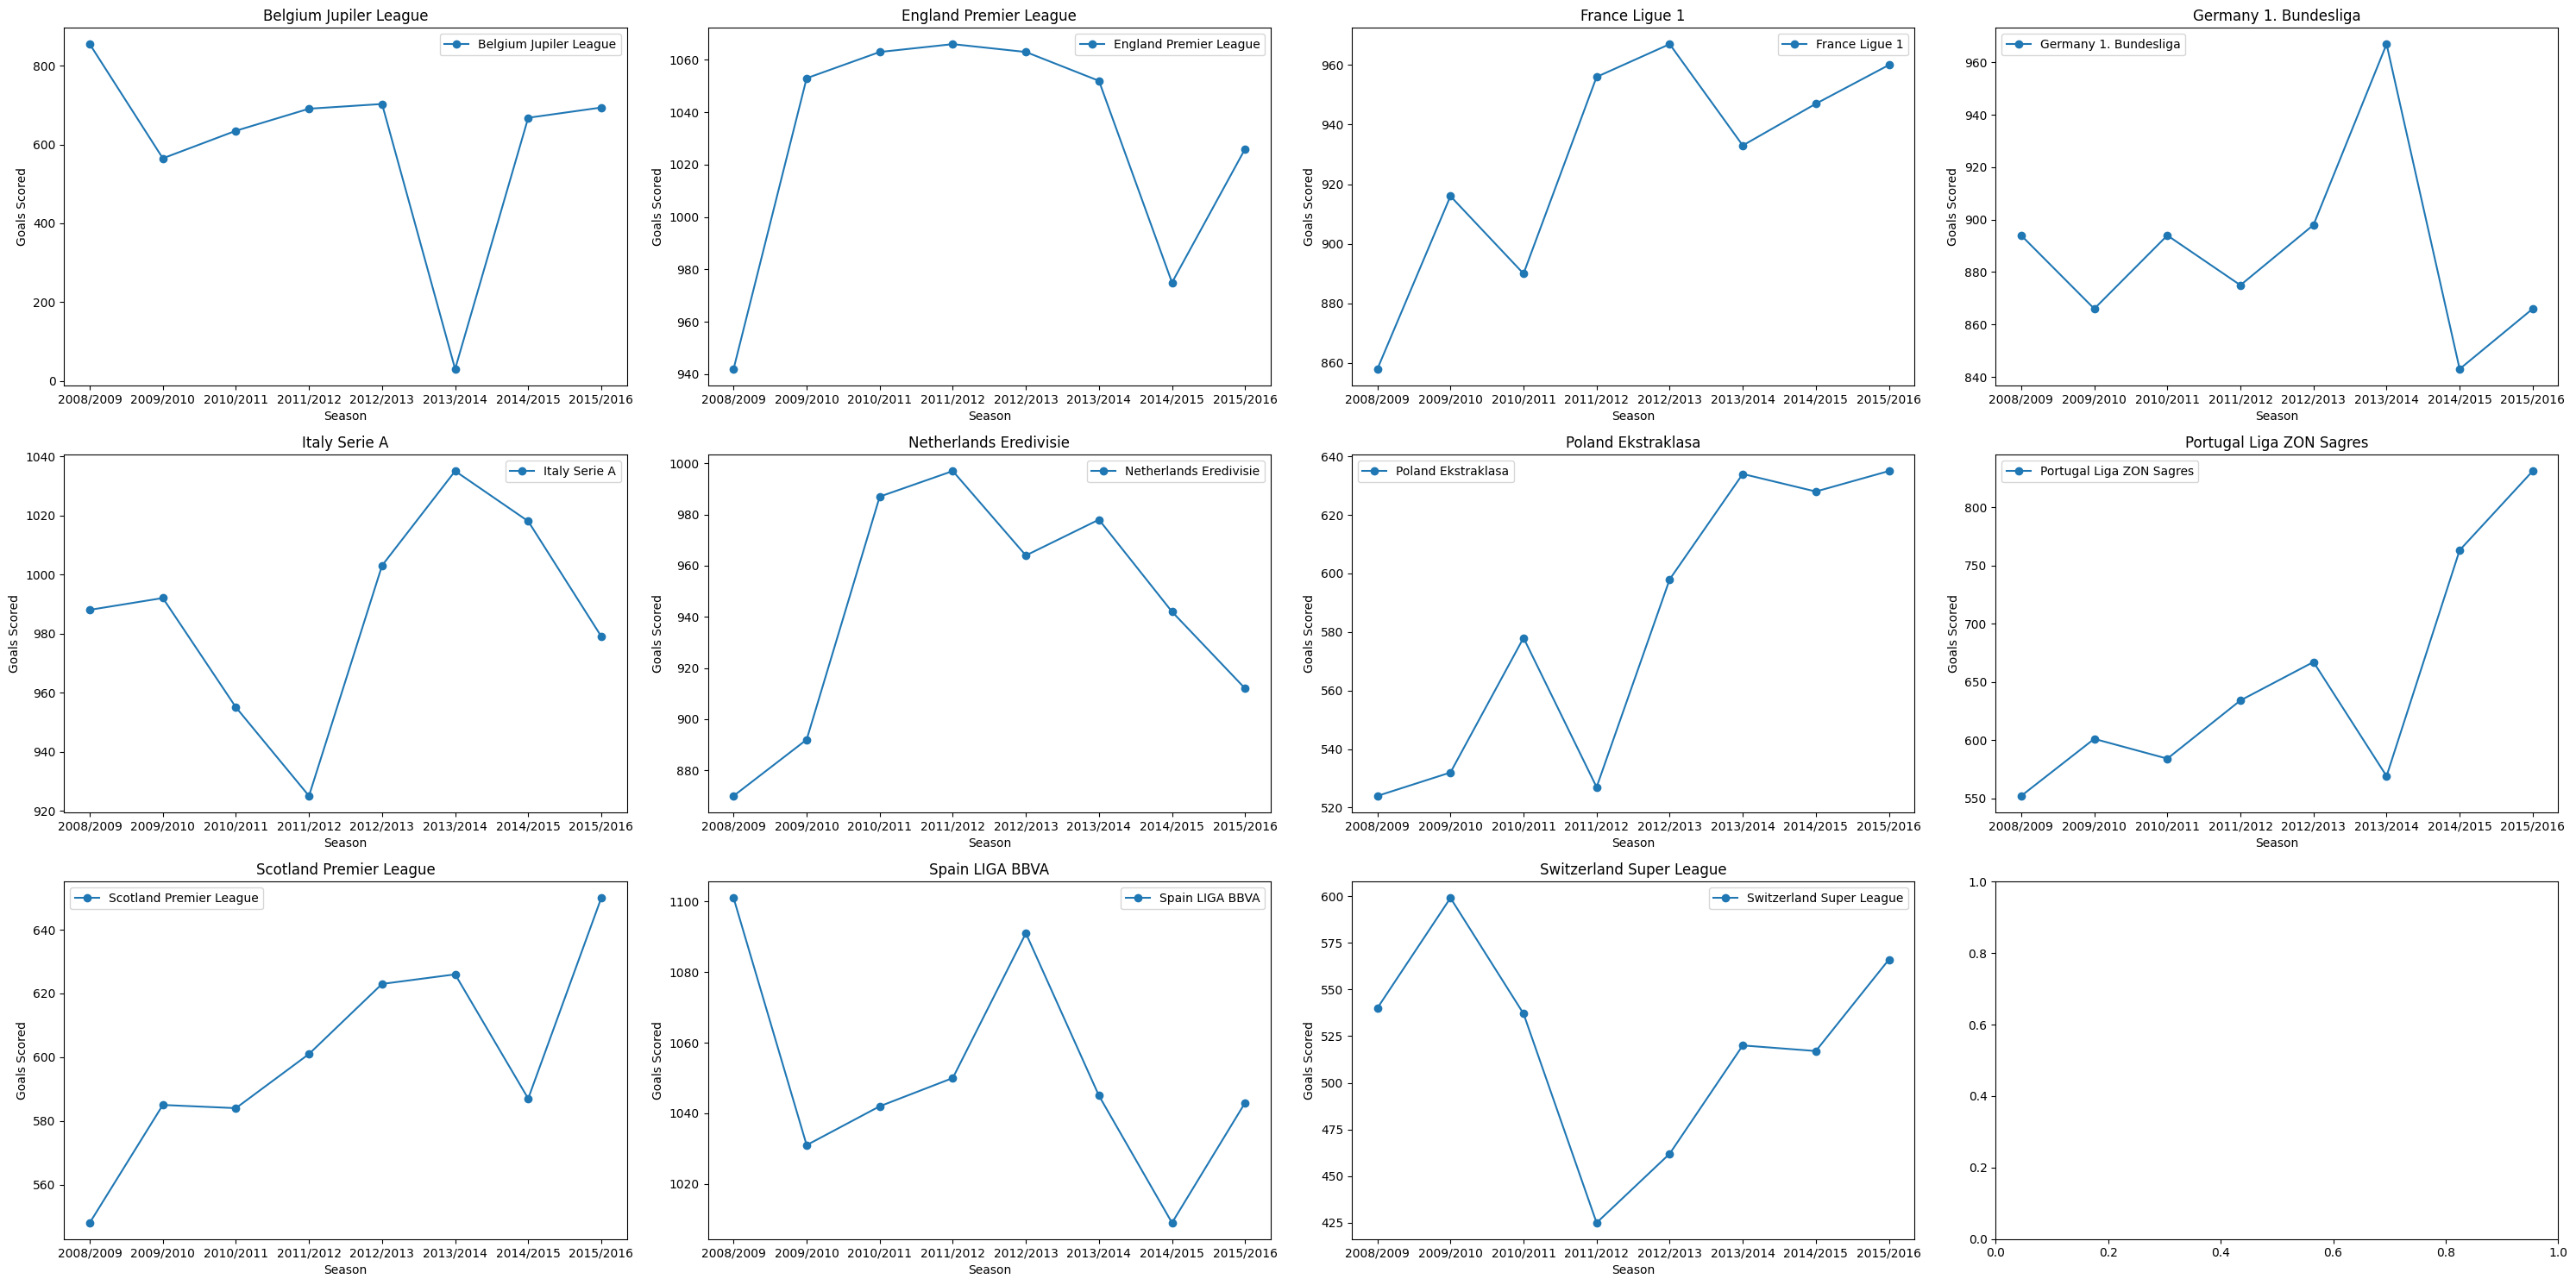

In [36]:
# plotting the data available
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(30, 15))

axes = axes.flatten()

for ax, league in zip(axes, leagues):
    league_data = grouped_df[grouped_df['League'] == league]
    ax.plot(league_data['season'], league_data['goals_scored'], marker='o', label=league)
    ax.set_title(league)
    ax.set_xlabel('Season')
    ax.set_ylabel('Goals Scored')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


This chart contains line plots for each league. The x-axis shows number of goals scored and the y-axis depicts the seasons. 

From the graphs above, we can see that the league "Portugal Liga Zon Sagres" has seen the most improvement in goals scored per season. 

<a id='question2'></a>

### Which defensive attributes lead to the most number of wins every season in the English Premier League?

In [37]:
# filtering the dataset for the England Premier League

epl_league = leagues_df[leagues_df['League'] == 'England Premier League']

epl_data = pd.merge(epl_league, matches_data, on='country_id', how='inner')

epl_data.head()

,id_x,Country,country_id,League,id_y,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,outcomes,goals_scored
0,1729,England,1729,England Premier League,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,1,0,2
1,1729,England,1729,England Premier League,1730,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,0,9825,1
2,1729,England,1729,England Premier League,1731,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,1,8650,1
3,1729,England,1729,England Premier League,1732,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,1,8654,3
4,1729,England,1729,England Premier League,1733,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,2,10252,6


In [38]:
# removing the matches with draws (draws have outcome as 0)

epl_filtered = epl_data[epl_data.outcomes != 0]
epl_filtered.head()

,id_x,Country,country_id,League,id_y,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,outcomes,goals_scored
1,1729,England,1729,England Premier League,1730,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,0,9825,1
2,1729,England,1729,England Premier League,1731,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,1,8650,1
3,1729,England,1729,England Premier League,1732,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,1,8654,3
4,1729,England,1729,England Premier League,1733,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,2,10252,6
5,1729,England,1729,England Premier League,1734,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,3,8655,5


In [39]:
# filtering the rows outcomes and season

epl_wins_seasons = pd.concat([epl_filtered.season, epl_filtered.outcomes], axis=1)
epl_wins_seasons.head()

,season,outcomes
1,2008/2009,9825
2,2008/2009,8650
3,2008/2009,8654
4,2008/2009,10252
5,2008/2009,8655


In [40]:
# using groupby to calculate wins for each team, and renaming the column outcomes to team_api_id to match with teams_attr dataframe

epl_wins_teams = epl_wins_seasons.groupby(['season', 'outcomes']).size().reset_index(name = 'wins')
epl_wins_teams.rename(columns={'outcomes':'team_api_id'}, inplace=True)
epl_wins_teams.head()

,season,team_api_id,wins
0,2008/2009,8455,25
1,2008/2009,8456,15
2,2008/2009,8462,10
3,2008/2009,8472,9
4,2008/2009,8528,12


In [41]:
teams_attr.date.unique()

array(['2010-02-22 00:00:00', '2014-09-19 00:00:00',
       '2015-09-10 00:00:00', '2011-02-22 00:00:00',
       '2012-02-22 00:00:00', '2013-09-20 00:00:00'], dtype=object)

In [42]:
epl_wins_teams.season.unique()

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

In [43]:
# adding seasons column to the teams_attr dataframe using the football calendar for recorded dates. 

seasons = []

for date in teams_attr.date:
    match date:
        case '2010-02-22 00:00:00':
            seasons.append('2009/2010')
        case '2011-02-22 00:00:00':
            seasons.append('2010/2011')
        case '2012-02-22 00:00:00':
            seasons.append('2011/2012')
        case '2013-09-20 00:00:00':
            seasons.append('2013/2014')
        case '2014-09-19 00:00:00':
            seasons.append('2014/2015')
        case '2015-09-10 00:00:00':
            seasons.append('2015/2016')

teams_attr = teams_attr.assign(season = seasons)
teams_attr.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,season
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,2009/2010
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,2014/2015
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,2015/2016
3,4,77,8485,2010-02-22 00:00:00,70,Fast,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,2009/2010
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,2010/2011


In [44]:
# merging the epl_wins_teams dataframe and teams_attr dataframe for defensive classes

teams_defence = pd.concat([teams_attr.team_api_id, teams_attr.season, teams_attr.defencePressureClass, teams_attr.defenceAggressionClass, teams_attr.defenceTeamWidthClass, teams_attr.defenceDefenderLineClass], axis=1)
teams_defence.head()

teams_defence = pd.merge(epl_wins_teams, teams_defence, on=['team_api_id', 'season'], how='inner')
teams_defence.head()

,season,team_api_id,wins,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass
0,2009/2010,8191,8,Medium,Double,Wide,Cover
1,2009/2010,8455,27,Deep,Press,Normal,Cover
2,2009/2010,8456,18,Medium,Press,Normal,Cover
3,2009/2010,8462,7,Medium,Double,Normal,Cover
4,2009/2010,8472,11,Medium,Double,Normal,Cover


In [45]:
# dropping the team_api_id column and grouping the wins based on defensive characteristics per season
teams_defence.drop('team_api_id', axis=1, inplace=True)
defence_grouped = teams_defence.groupby(['season', 'defencePressureClass', 'defenceAggressionClass', 'defenceTeamWidthClass', 'defenceDefenderLineClass']).sum().reset_index()
defence_grouped.head()

,season,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass,wins
0,2009/2010,Deep,Double,Narrow,Cover,25
1,2009/2010,Deep,Press,Normal,Cover,50
2,2009/2010,High,Double,Wide,Cover,28
3,2009/2010,Medium,Double,Normal,Cover,77
4,2009/2010,Medium,Double,Wide,Cover,8


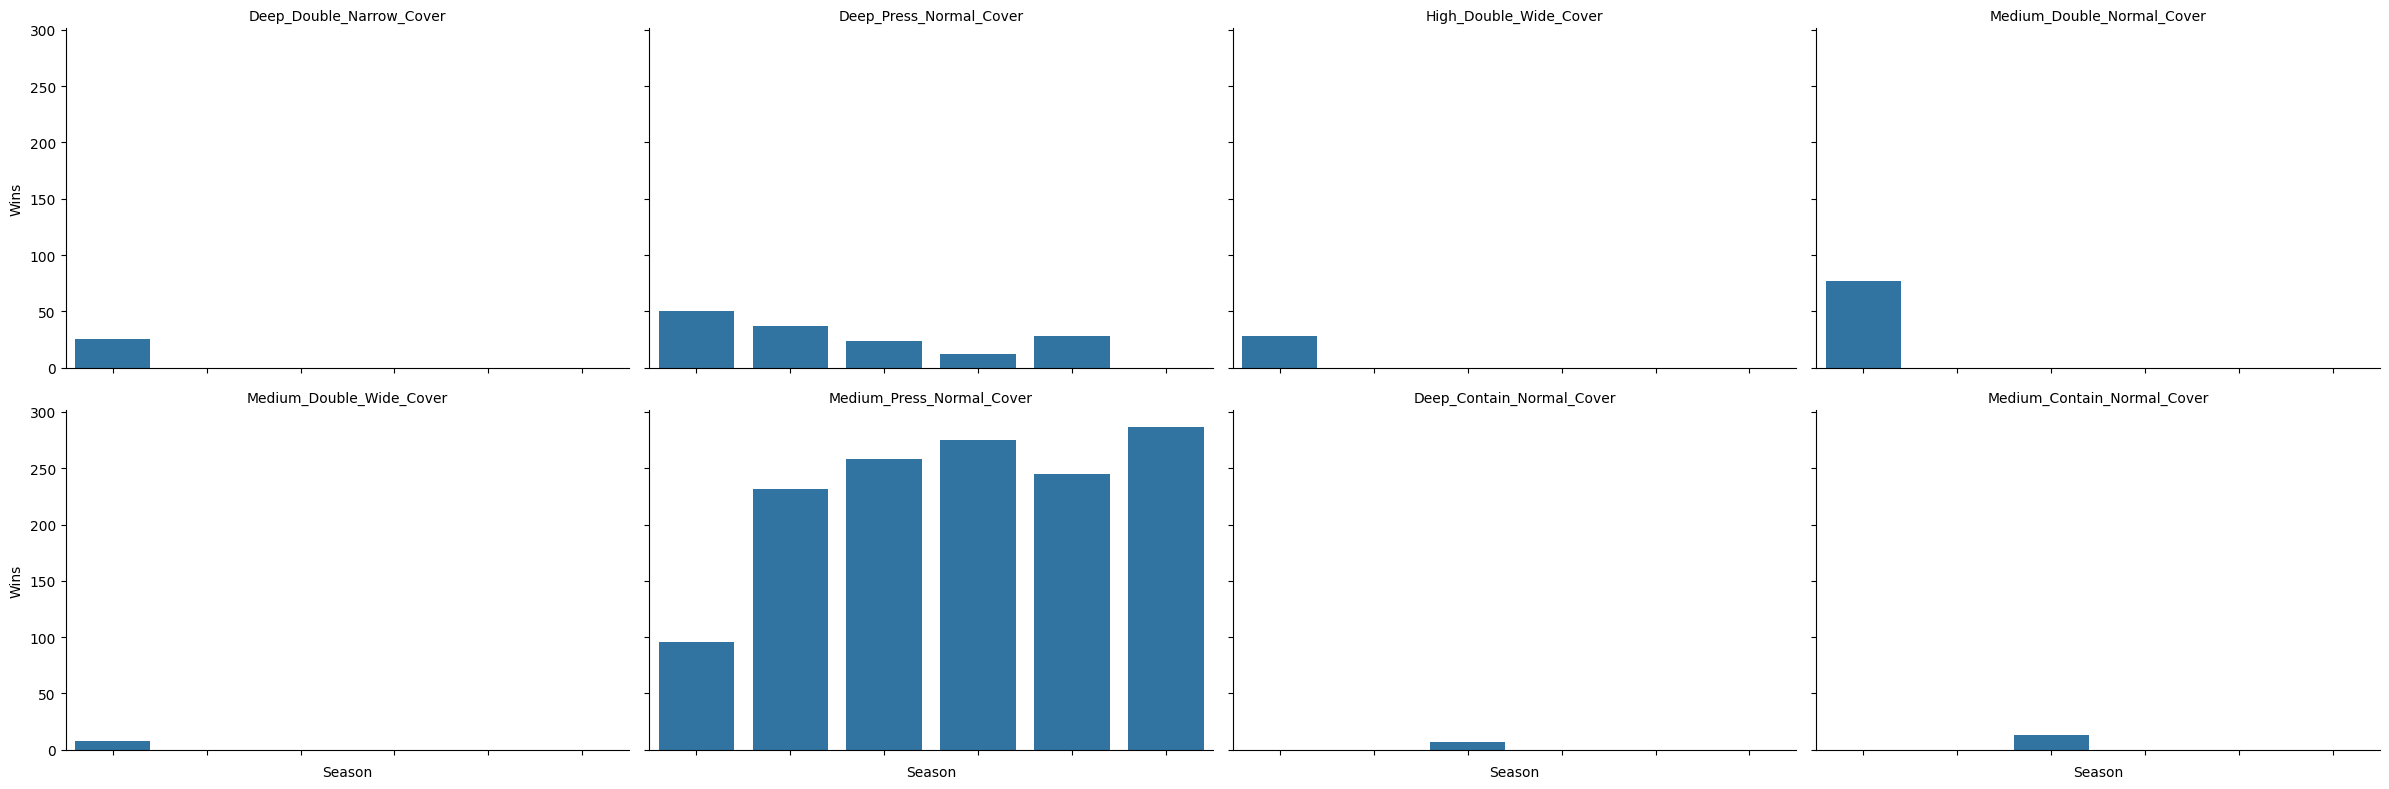

In [46]:
# Plotting the available data
columns = ['defencePressureClass', 'defenceAggressionClass', 'defenceTeamWidthClass', 'defenceDefenderLineClass']


defence_grouped['defence_combination'] = defence_grouped[columns].apply(lambda row: '_'.join(row.values), axis=1)
g = sns.FacetGrid(defence_grouped, col='defence_combination', col_wrap=4, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='season', y='wins')
g.set_axis_labels('Season', 'Wins')
g.set_titles('{col_name}')
g.set_xticklabels(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


The chart above shows the number of wins each season, for each combination of defensive attributes. This is used to identify which defensive combination results in the most number of wins each season in the English Premier League. 

From the graph above we see that the following defensive attributes result in the most wins every season:
<li>defencePressureClass : medium</li>
<li>defenceAggressionClass : press</li>
<li>defenceTeamWidthClass : normal</li>
<li>defenceDefenderLineClass : cover</li>

In [50]:
defence_grouped.defenceDefenderLineClass.unique()

array(['Cover'], dtype=object)

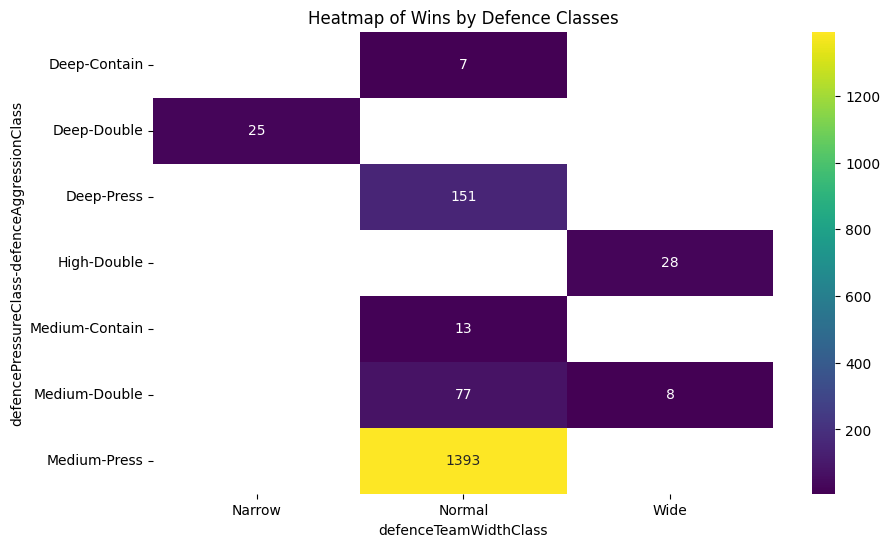

In [49]:
# displaying the total number of wins for each combination of defensive attributes across all seasons. 
# not using the defenceDefenderLineClass as it has a constant value every time. 

heatmap_data = defence_grouped.pivot_table(index=['defencePressureClass', 'defenceAggressionClass'],
                              columns=['defenceTeamWidthClass'],
                              values='wins',
                              aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='viridis')
plt.title('Heatmap of Wins by Defence Classes')
plt.show()

The heatmap above represents the total number of wins when teams used a certain combination of the defensive attributes. 

The heatmap correlates with the barchart shown above, to show medium pressure, aggresion as press and width as normal amounts to most wins. 

<a id='conclusions'></a>
## Conclusions

### Which league has seen the most improvement in terms of goals scored per season?

For this question, using the line plot available, we can say that the league "Portual Liga Zon Sagres" has seen the mose the improvement in terms of goals scored per season. 

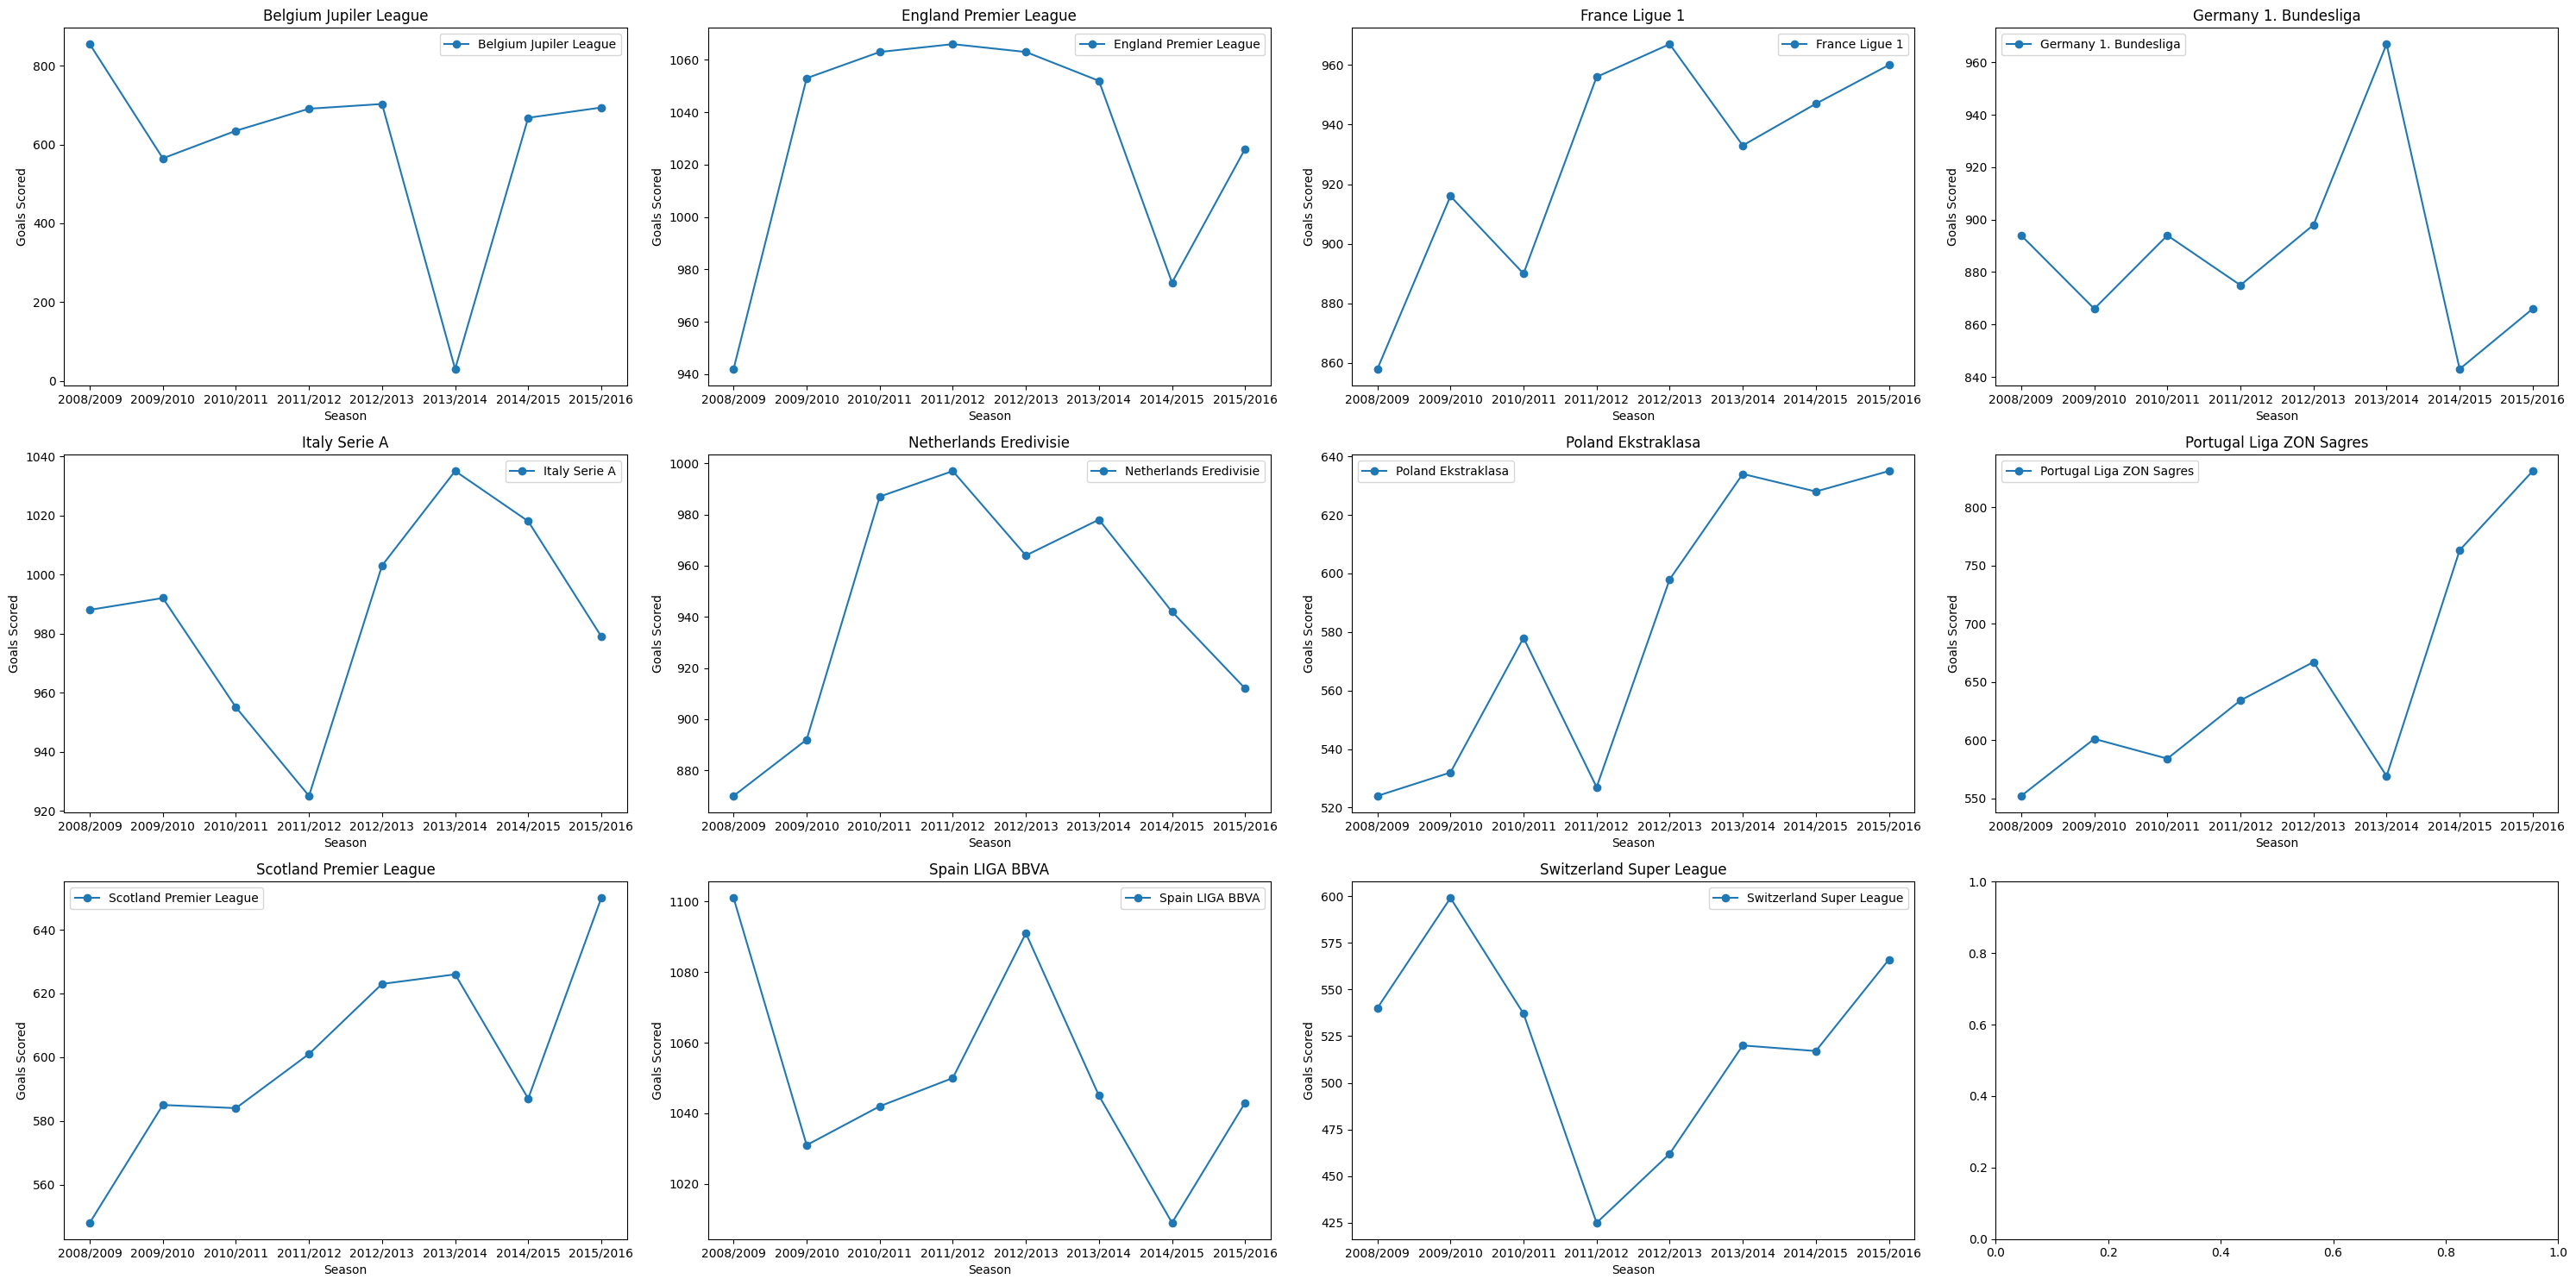

### Which defensive attributes lead to the most number of wins every season in the English Premier League?

For this question, we can see that the following defensive attributes' combination contribute to the most wins in every season in the English Premier League:
<li>defencePressureClass : medium</li>
<li>defenceAggressionClass : press</li>
<li>defenceTeamWidthClass : normal</li>
<li>defenceDefenderLineClass : cover</li>

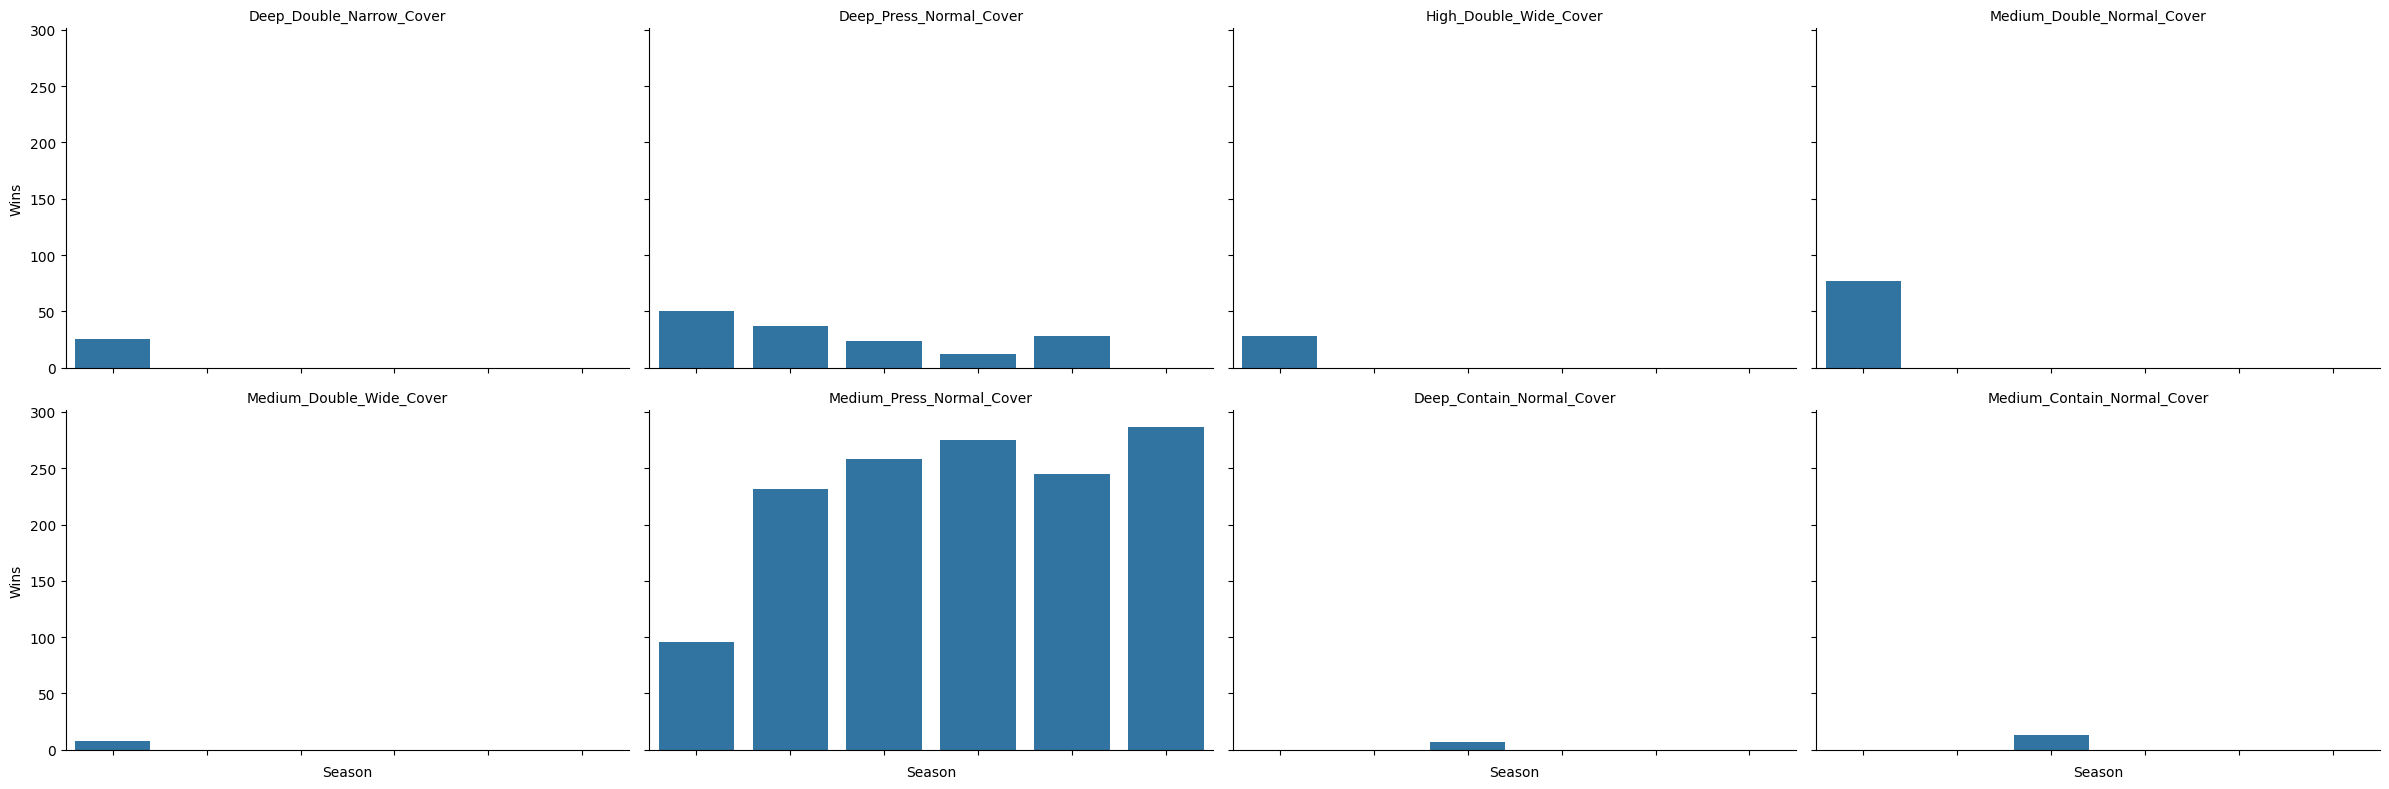

Across all seasons, this combination has resulted in the most number of wins, as shown in the heatmap below.

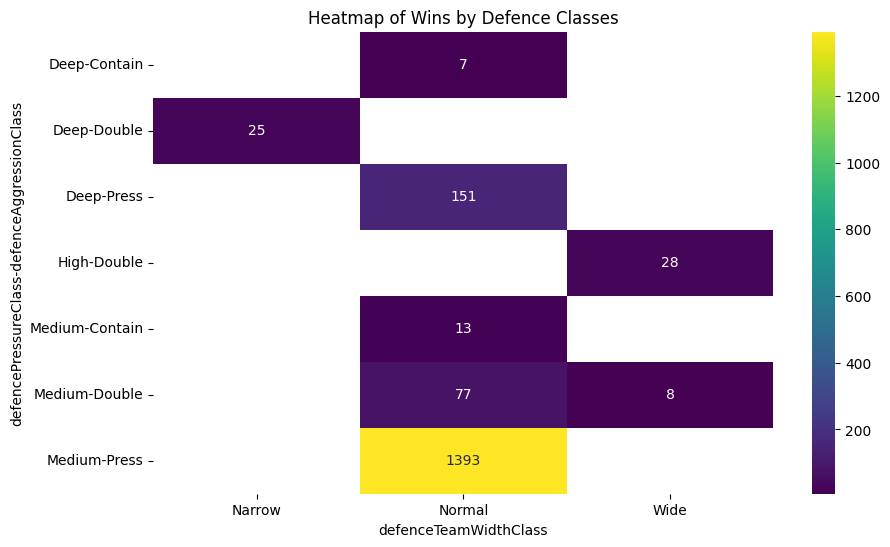

### Limitations:

For this study, we do not consider the number of teams that fall under each league. Moreover, the last available data point for the dataset is for the 2015/16 season. Any changes to the way of playing can result in changing results of the analysis conducted. 